In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
sc.settings.set_figure_params(dpi=100)

In [5]:
# read in the levenshtein distance for the epitope information
df_l = pd.read_csv('../outputs/model_v3/full.epitope.levenshtein.csv', index_col=0)

(0.0, 37.8)

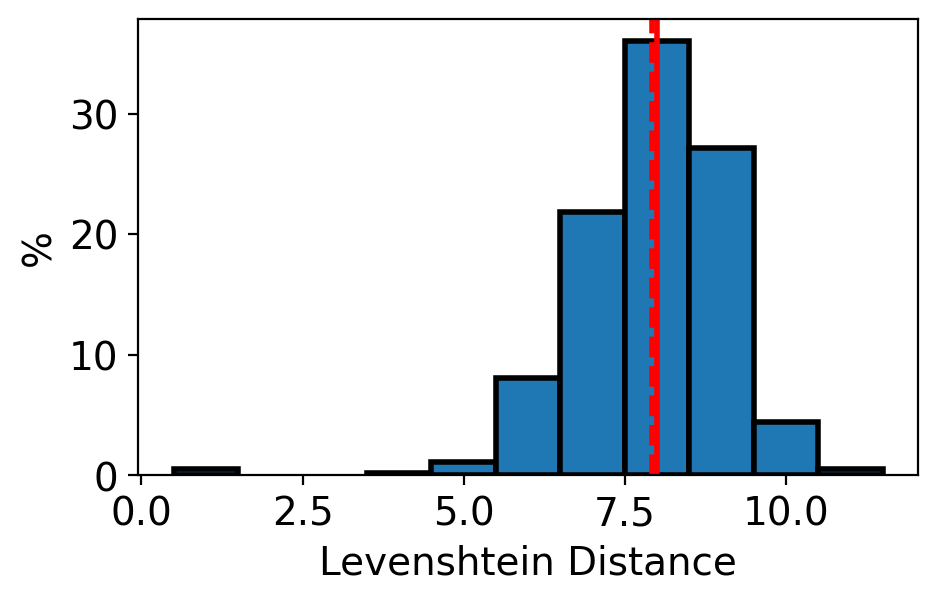

In [6]:
# check the levenshtein distance, weighted
fig, ax = plt.subplots(figsize=[5, 3])
ax.grid(False)
values = df_l['NLVPMVATV'][df_l['NLVPMVATV'] > 0]
bars = pd.Series(values).value_counts()
bars /= bars.sum() * 0.01
order = sorted(bars.index)
ax.bar(order, bars.loc[order], linewidth=2, edgecolor='k', width=1)
ax.set(xlabel='Levenshtein Distance', ylabel='%')
# now get mean and median
vmean, vmedian = values.mean(), values.median()
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ax.plot([vmean]*2, ylim, color='r', linestyle='--', lw=2)
ax.plot([vmedian]*2, ylim, color='r', linestyle='-', lw=2)
ax.set_xlim(*xlim); ax.set_ylim(*ylim)

In [7]:
# provide actual numbers
print(vmean, vmedian)

7.916190476190476 8.0


In [8]:
# give some examples
np.random.seed(0)
np.random.choice(df_l.index[df_l['NLVPMVATV'] == 8], size=3, replace=False)

array(['VLCNSQTSL', 'KIFGSLAFL', 'TYLPSAWNF'], dtype=object)

In [9]:
# we'll read both of these values and the original input and irrelevant tcrs
cdr3_to_X = pd.read_csv('../outputs/model_v3/cdr3.conversion.n30.csv', index_col=0)
ag_to_X = pd.read_csv('../outputs/model_v3/epitope.conversion.n15.csv', index_col=0)
hit = pd.read_csv('../outputs/model_v3/full.input.X.csv', index_col=0)
irr = pd.read_csv('../outputs/model_v3/full.control.X.csv', index_col=0)
irr = irr.reset_index().iloc[:, 1:]

## now perform the actual tests

In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve, auc, accuracy_score
from tqdm import tqdm

%load_ext tensorboard

2024-01-03 15:27:21.965234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-03 15:27:22.105701: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 15:27:22.748684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-03 15:27:22.748779: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [11]:
# save the original hit and irr
hit_orig, irr_orig = hit.copy(), irr.copy()

4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.5926 - accuracy: 0.6764 - auc: 0.7439 - val_loss: 0.5544 - val_accuracy: 0.7140 - val_auc: 0.7915
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5313 - accuracy: 0.7272 - auc: 0.8058 - val_loss: 0.5629 - val_accuracy: 0.7043 - val_auc: 0.7923
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5056 - accuracy: 0.7378 - auc: 0.8261 - val_loss: 0.5341 - val_accuracy: 0.7205 - val_auc: 0.8156
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.7611 - auc: 0.8490 - val_loss: 0.5253 - val_accuracy: 0.7401 - val_auc: 0.8161
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4419 - accuracy: 0.7840 - auc: 0.8720 - val_loss: 0.5037 - val_accuracy: 0.7523 - val_auc: 0.8362
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3962 - accuracy: 0.8130 - auc: 0.9

260/260 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.8188 - auc: 0.9076 - val_loss: 0.4785 - val_accuracy: 0.7740 - val_auc: 0.8563
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3224 - accuracy: 0.8591 - auc: 0.9374 - val_loss: 0.4749 - val_accuracy: 0.7983 - val_auc: 0.8698
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.2489 - accuracy: 0.9003 - auc: 0.9643 - val_loss: 0.4928 - val_accuracy: 0.7787 - val_auc: 0.8812
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.1829 - accuracy: 0.9300 - auc: 0.9818 - val_loss: 0.4832 - val_accuracy: 0.8181 - val_auc: 0.8887
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.5916 - accuracy: 0.6734 - auc: 0.7434 - val_loss: 0.5672 - val_accuracy: 0.6985 - val_auc: 0.7853
Epoch 2/10
260/260 [==============================] - 

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.5898 - accuracy: 0.6746 - auc: 0.7479 - val_loss: 0.5618 - val_accuracy: 0.7014 - val_auc: 0.7790
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5243 - accuracy: 0.7307 - auc: 0.8130 - val_loss: 0.5523 - val_accuracy: 0.7111 - val_auc: 0.7916
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4947 - accuracy: 0.7492 - auc: 0.8369 - val_loss: 0.5397 - val_accuracy: 0.7158 - val_auc: 0.8031
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4712 - accuracy: 0.7639 - auc: 0.8536 - val_loss: 0.5265 - val_accuracy: 0.7281 - val_auc: 0.8157
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4290 - accuracy: 0.7927 - auc: 0.8824 - val_loss: 0.5081 - val_accuracy: 0.7545 - val_auc: 0.8349
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3797 - accuracy: 0.8259 - auc: 0.9107 - val_loss: 0.49

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3930 - accuracy: 0.8019 - auc: 0.8974 - val_loss: 0.4827 - val_accuracy: 0.7415 - val_auc: 0.8443
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3660 - accuracy: 0.8235 - auc: 0.9142 - val_loss: 0.4893 - val_accuracy: 0.7444 - val_auc: 0.8446
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3420 - accuracy: 0.8431 - auc: 0.9269 - val_loss: 0.4939 - val_accuracy: 0.7581 - val_auc: 0.8500
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3084 - accuracy: 0.8660 - auc: 0.9419 - val_loss: 0.5379 - val_accuracy: 0.7567 - val_auc: 0.8479
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.5545 - accuracy: 0.6917 - auc: 0.7818 - val_loss: 0.4912 - val_accuracy: 0.7473 - val_auc: 0.8398
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.5510 - accuracy: 0.6988 - auc: 0.7868 - val_loss: 0.4924 - val_accuracy: 0.7364 - val_auc: 0.8300
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4699 - accuracy: 0.7521 - auc: 0.8491 - val_loss: 0.4834 - val_accuracy: 0.7231 - val_auc: 0.8299
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4492 - accuracy: 0.7620 - auc: 0.8609 - val_loss: 0.4781 - val_accuracy: 0.7249 - val_auc: 0.8368
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4308 - accuracy: 0.7767 - auc: 0.8728 - val_loss: 0.4798 - val_accuracy: 0.7343 - val_auc: 0.8364
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.7852 - auc: 0.8826 - val_loss: 0.4782 - val_accuracy: 0.7350 - val_auc: 0.8417
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3964 - accuracy: 0.7975 - auc: 0.8950 - val_loss: 0.49

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5213 - accuracy: 0.7256 - auc: 0.8126 - val_loss: 0.6577 - val_accuracy: 0.6309 - val_auc: 0.6993
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4918 - accuracy: 0.7475 - auc: 0.8373 - val_loss: 0.6640 - val_accuracy: 0.6403 - val_auc: 0.7016
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4502 - accuracy: 0.7746 - auc: 0.8682 - val_loss: 0.7086 - val_accuracy: 0.6363 - val_auc: 0.6979
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4099 - accuracy: 0.8040 - auc: 0.8939 - val_loss: 0.7101 - val_accuracy: 0.6576 - val_auc: 0.7159
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6726 - accuracy: 0.5813 - auc: 0.6136 - val_loss: 0.6606 - val_accuracy: 0.6041 - val_auc: 0.6472
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6741 - accuracy: 0.5693 - auc: 0.6035 - val_loss: 0.6494 - val_accuracy: 0.6208 - val_auc: 0.6683
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6342 - accuracy: 0.6271 - auc: 0.6857 - val_loss: 0.6476 - val_accuracy: 0.6236 - val_auc: 0.6798
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6093 - accuracy: 0.6476 - auc: 0.7192 - val_loss: 0.6490 - val_accuracy: 0.6208 - val_auc: 0.6803
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5888 - accuracy: 0.6692 - auc: 0.7437 - val_loss: 0.6287 - val_accuracy: 0.6410 - val_auc: 0.7001
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5634 - accuracy: 0.6903 - auc: 0.7732 - val_loss: 0.6396 - val_accuracy: 0.6388 - val_auc: 0.7070
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5376 - accuracy: 0.7115 - auc: 0.7976 - val_loss: 0.63

Epoch 6/10
260/260 [==============================] - 1s 5ms/step - loss: 0.5656 - accuracy: 0.6812 - auc: 0.7678 - val_loss: 0.6615 - val_accuracy: 0.6052 - val_auc: 0.6770
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5279 - accuracy: 0.7191 - auc: 0.8085 - val_loss: 0.6627 - val_accuracy: 0.6269 - val_auc: 0.6923
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4823 - accuracy: 0.7627 - auc: 0.8487 - val_loss: 0.6665 - val_accuracy: 0.6345 - val_auc: 0.7114
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4223 - accuracy: 0.8016 - auc: 0.8908 - val_loss: 0.6707 - val_accuracy: 0.6562 - val_auc: 0.7236
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6816 - accuracy: 0.5659 - auc: 0.5911 - val_loss: 0.6654 - val_accuracy: 0.5936 - val_auc: 0.6343
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 6ms/step - loss: 0.6810 - accuracy: 0.5636 - auc: 0.5899 - val_loss: 0.6819 - val_accuracy: 0.5560 - val_auc: 0.6228
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6484 - accuracy: 0.6106 - auc: 0.6605 - val_loss: 0.6710 - val_accuracy: 0.5832 - val_auc: 0.6310
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6344 - accuracy: 0.6252 - auc: 0.6827 - val_loss: 0.6630 - val_accuracy: 0.5962 - val_auc: 0.6381
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6142 - accuracy: 0.6414 - auc: 0.7104 - val_loss: 0.6627 - val_accuracy: 0.5994 - val_auc: 0.6468
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5936 - accuracy: 0.6535 - auc: 0.7354 - val_loss: 0.6659 - val_accuracy: 0.5958 - val_auc: 0.6515
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5691 - accuracy: 0.6814 - auc: 0.7639 - val_loss: 0.66

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5099 - accuracy: 0.7358 - auc: 0.8208 - val_loss: 0.5893 - val_accuracy: 0.6772 - val_auc: 0.7509
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4761 - accuracy: 0.7562 - auc: 0.8475 - val_loss: 0.5935 - val_accuracy: 0.6880 - val_auc: 0.7600
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4294 - accuracy: 0.7915 - auc: 0.8814 - val_loss: 0.5928 - val_accuracy: 0.7007 - val_auc: 0.7759
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3759 - accuracy: 0.8262 - auc: 0.9132 - val_loss: 0.6185 - val_accuracy: 0.7014 - val_auc: 0.7840
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6550 - accuracy: 0.6005 - auc: 0.6466 - val_loss: 0.6387 - val_accuracy: 0.6229 - val_auc: 0.6807
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6579 - accuracy: 0.5889 - auc: 0.6379 - val_loss: 0.6315 - val_accuracy: 0.6341 - val_auc: 0.6943
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6157 - accuracy: 0.6326 - auc: 0.7049 - val_loss: 0.6121 - val_accuracy: 0.6298 - val_auc: 0.7094
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5925 - accuracy: 0.6603 - auc: 0.7346 - val_loss: 0.6034 - val_accuracy: 0.6396 - val_auc: 0.7197
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5732 - accuracy: 0.6772 - auc: 0.7564 - val_loss: 0.5970 - val_accuracy: 0.6471 - val_auc: 0.7262
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5483 - accuracy: 0.7014 - auc: 0.7849 - val_loss: 0.6025 - val_accuracy: 0.6396 - val_auc: 0.7232
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5260 - accuracy: 0.7228 - auc: 0.8073 - val_loss: 0.60

260/260 [==============================] - 1s 4ms/step - loss: 0.5101 - accuracy: 0.7354 - auc: 0.8215 - val_loss: 0.6005 - val_accuracy: 0.6649 - val_auc: 0.7428
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4743 - accuracy: 0.7569 - auc: 0.8493 - val_loss: 0.6102 - val_accuracy: 0.6623 - val_auc: 0.7431
Epoch 8/10
260/260 [==============================] - 1s 5ms/step - loss: 0.4262 - accuracy: 0.7969 - auc: 0.8846 - val_loss: 0.6055 - val_accuracy: 0.6884 - val_auc: 0.7686
Epoch 9/10
260/260 [==============================] - 1s 5ms/step - loss: 0.3741 - accuracy: 0.8307 - auc: 0.9142 - val_loss: 0.6313 - val_accuracy: 0.6938 - val_auc: 0.7701
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
0.1066836581247657 0.01608565181830234 0.3598698481561822 0.04975090735139547


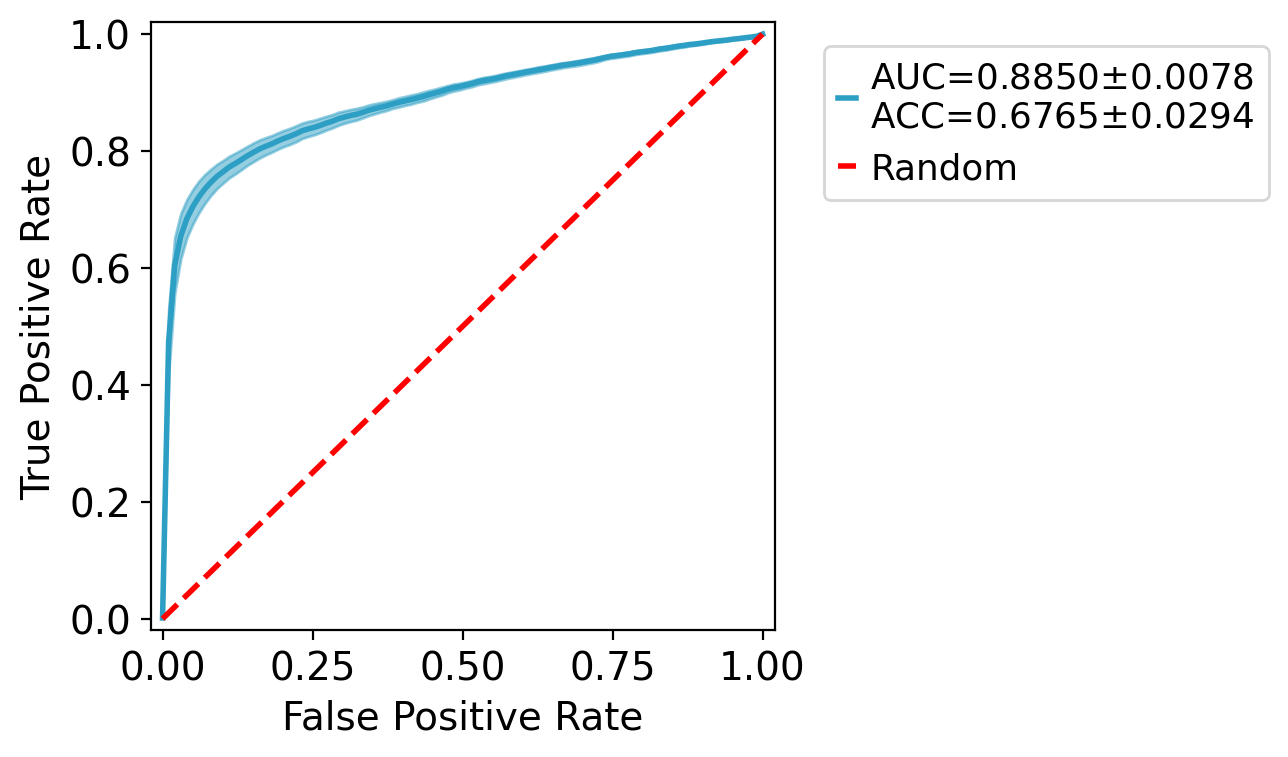

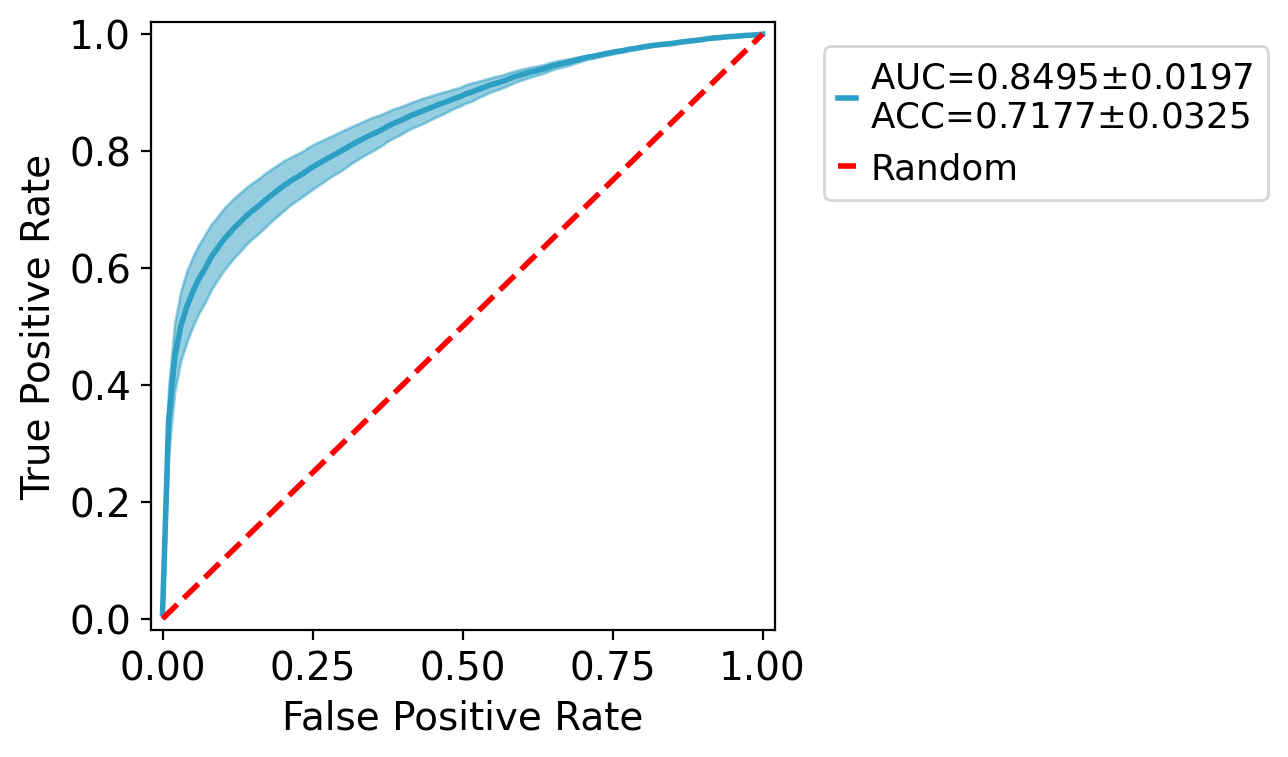

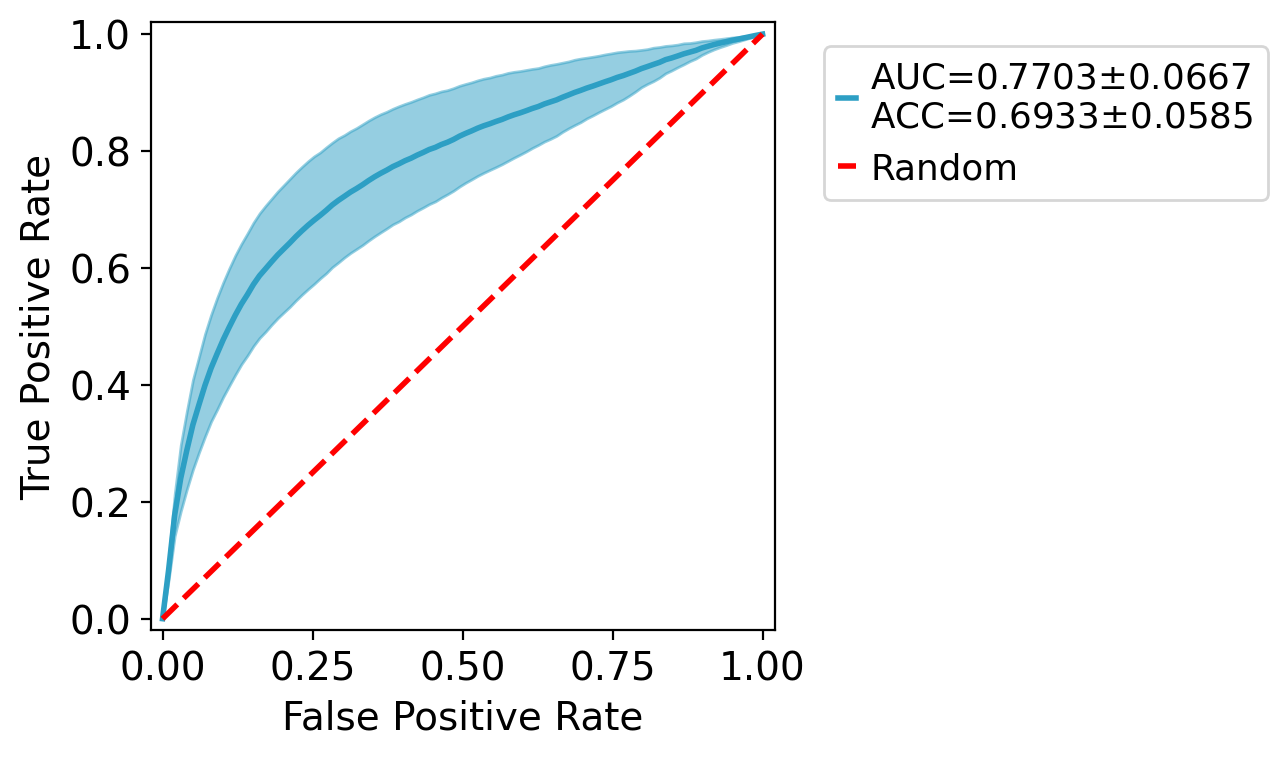

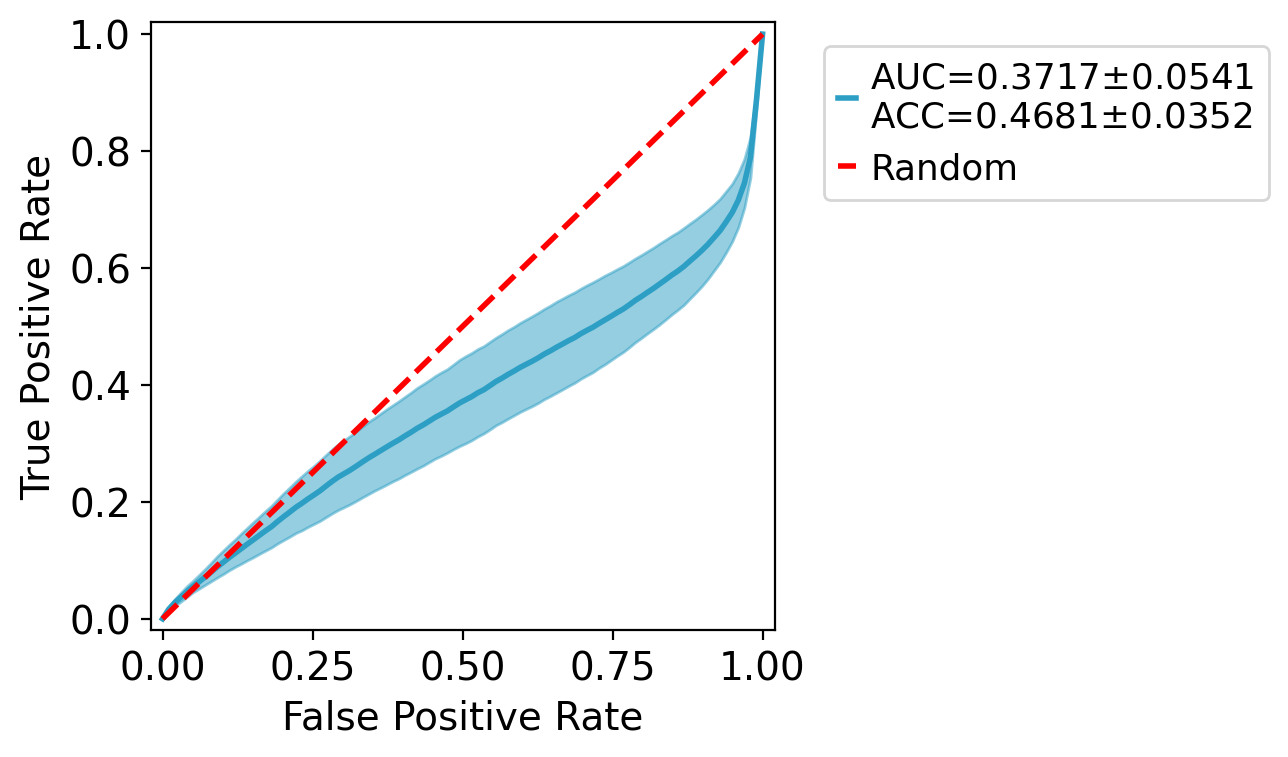

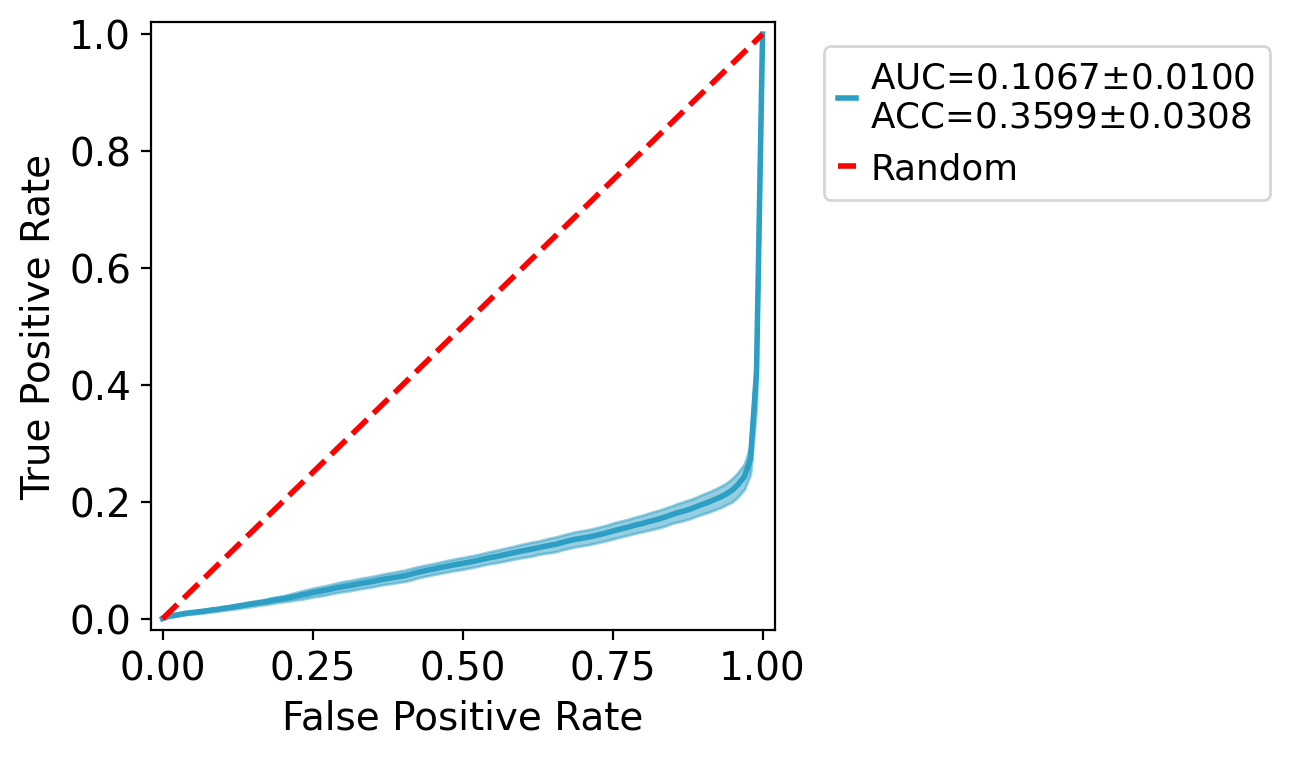

In [14]:
# check all possible levenshteins
vmax2stats = {}
for vmax in range(6, 11):
    # set seed and identify irrelevant matches
    np.random.seed(0)
    
    # now retrieve the the temporary hit and irr
    hit, irr = hit_orig.copy(), irr_orig.copy()
    # strict cutoff method
    valid_peptides = df_l.index[(df_l['NLVPMVATV'] == vmax) | (df_l.index == 'NLVPMVATV')]
    hit = hit.loc[hit['Epitope'].isin(valid_peptides)].reset_index().iloc[:, 1:]
    irr = irr.loc[irr['Epitope'].isin(valid_peptides)].reset_index().iloc[:, 1:]
    # resubset irr to be the same size as hit
    if irr.shape[0] != hit.shape[0]:
        need_replace = hit.shape[0] > irr.shape[0]
        valid_idxs = np.random.choice(irr.index, replace=need_replace, size=hit.shape[0])
        irr = irr.loc[valid_idxs].reset_index().iloc[:, 1:]
    
    # assemble hold out
    df_ext_X_hit = hit_orig.loc[hit_orig['Epitope'] == 'NLVPMVATV']
    df_ext_X_irr = irr_orig.loc[irr_orig['Epitope'] == 'NLVPMVATV']
    df_ext_y = pd.concat([pd.Series(np.ones(df_ext_X_hit.shape[0]), index=df_ext_X_hit),
                          pd.Series(np.zeros(df_ext_X_irr.shape[0]), index=df_ext_X_irr)], axis=0)
    df_ext_X = pd.concat([df_ext_X_hit, df_ext_X_irr], axis=0).reset_index().iloc[:, 1:]
    df_ext_y = df_ext_y.reset_index().iloc[:, 1]
    
    # retrieve values and aucs
    fprs, tprs, aucs, accs = [], [], [], []

    # complete 10 iterations
    for seed in range(10):
        ## SETUP CONSTANTS
        # grab a subset
        np.random.seed(seed)

        ## SEPARATE OUT TRAINING AND TESTING
        # disqualify peptides from hit and irr
        # define masks to ensure we only use non NLV specific CDR3s
        mask_hit = ~(hit['CDR3'].isin(df_ext_X['CDR3']) | hit['Epitope'].isin(df_ext_X['Epitope']))
        mask_irr = ~(irr['CDR3'].isin(df_ext_X['CDR3']) | irr['Epitope'].isin(df_ext_X['Epitope']))
        # use masks to determine size
        n_rows = df_ext_X_hit.shape[0]
        perc_train = 0.75
        
        # train and test
        # > subset target
        need_replace = n_rows > hit[mask_hit].shape[0]
        idxs = np.random.choice(hit.index[mask_hit], size=n_rows, replace=need_replace)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        print(len(idxs), len(idys))
        hit_train, hit_test = hit.loc[idxs], hit.loc[idys]
        # > subset control
        need_replace = n_rows > hit[mask_irr].shape[0]
        idxs = np.random.choice(irr.index[mask_irr], size=n_rows, replace=need_replace)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        print(len(idxs), len(idys))
        irr_train, irr_test = irr.loc[idxs], irr.loc[idys]
        # confirm no overlap
        assert not hit_train.index.isin(hit_test.index).all()
        assert not irr_train.index.isin(irr_test.index).all()


        ## CONVERT TO CORRECT FORMAT
        # create X for training
        X_train = pd.concat([hit_train, irr_train], axis=0).reset_index().iloc[:, 1:]
        X_train_cdr3s = cdr3_to_X.loc[X_train['CDR3']].reset_index().iloc[:, 1:]
        X_train_epitopes = ag_to_X.loc[X_train['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_train_cdr3s.columns = 'cdr3:' + X_train_cdr3s.columns
        X_train_epitopes.columns = 'ag:' + X_train_epitopes.columns
        X_train = X_train_cdr3s.join(X_train_epitopes)

        # grab y for training
        y_train = pd.concat([pd.Series(np.ones(hit_train.shape[0])),
                             pd.Series(np.zeros(irr_train.shape[0]))], axis=0).astype(int)
        y_train = y_train.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_train.shape[0] == y_train.shape[0]

        # create X for testing
        X_test = pd.concat([hit_test, irr_test], axis=0).reset_index().iloc[:, 1:]
        X_test_cdr3s = cdr3_to_X.loc[X_test['CDR3']].reset_index().iloc[:, 1:]
        X_test_epitopes = ag_to_X.loc[X_test['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_test_cdr3s.columns = 'cdr3:' + X_test_cdr3s.columns
        X_test_epitopes.columns = 'ag:' + X_test_epitopes.columns
        X_test = X_test_cdr3s.join(X_test_epitopes)

        # grab y for testing
        y_test = pd.concat([pd.Series(np.ones(hit_test.shape[0])),
                             pd.Series(np.zeros(irr_test.shape[0]))], axis=0).astype(int)
        y_test = y_test.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_test.shape[0] == y_test.shape[0]

        # create X for validation
        X_val = df_ext_X.copy().reset_index().iloc[:, 1:]
        X_val_cdr3s = cdr3_to_X.loc[X_val['CDR3']].reset_index().iloc[:, 1:]
        X_val_epitopes = ag_to_X.loc[X_val['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_val_cdr3s.columns = 'cdr3:' + X_val_cdr3s.columns
        X_val_epitopes.columns = 'ag:' + X_val_epitopes.columns
        X_val = X_val_cdr3s.join(X_val_epitopes)
        # grab y for validation
        y_val = df_ext_y.copy().reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_val.shape[0] == y_val.shape[0]

        # remove constant columns
        X_train = X_train.loc[:, X_train.nunique(0) > 1]
        X_train = X_train.loc[:, X_train.sum(0) > 0]
        # read in normalization factors
        means = X_train.mean(0)
        stds = (X_train - means).std(0)
        # subset for relevant columns
        X_train = X_train[means.index]
        X_test = X_test[means.index]
        X_val = X_val[means.index]
        # normalize
        X_train -= means
        X_train /= stds
        X_test -= means
        X_test /= stds
        X_val -= means
        X_val /= stds

        ## SETUP MODEL
        # retrieve the appropriate columns
        cols_cdr3 = X_val.columns[X_val.columns.str.startswith('cdr3')]
        cols_ag = X_val.columns[X_val.columns.str.startswith('ag')]

        # determine model parameters
        # > layer for cdr3 alone
        input_1 = keras.layers.Input(shape=(len(cols_cdr3)))
        output_1 = keras.layers.Dense(200, activation='sigmoid')(input_1)
        # > layer for ag alone
        input_2 = keras.layers.Input(shape=(len(cols_ag)))
        output_2 = keras.layers.Dense(100, activation='sigmoid')(input_2)
        # > combined layer
        concat_3 = keras.layers.Concatenate()([output_1, output_2])
        output_3 = keras.layers.Dense(100, activation='sigmoid')(concat_3)
        # > final logit softmax layer
        output_4 = keras.layers.Dense(1, activation='sigmoid')(output_3)
        model = keras.Model(inputs=[input_1, input_2], outputs=[output_4])
        # set up the training parameters for the model
        model.compile(
            optimizer=keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy','AUC'],
        )
        # train the model
        history = model.fit([X_train[cols_cdr3], X_train[cols_ag]], y_train,
                            epochs=10,
                            validation_data=([X_test[cols_cdr3], X_test[cols_ag]], y_test),
                            workers=40, use_multiprocessing=True)

        # testing predictions
        y_pred = model.predict([X_val[cols_cdr3], X_val[cols_ag]],
                               workers=40, use_multiprocessing=True)[:, 0]
        y_pred = pd.Series(y_pred, index=y_val.index, name='Pred%')
        y_pred = pd.concat([y_pred, y_val], axis=1)

        # retrieve auc metrics
        fpr, tpr, _ = roc_curve(y_pred[0], y_pred['Pred%'])
        fprs.append(fpr.tolist())
        tprs.append(tpr.tolist())
        aucs.append(auc(fpr, tpr))
        accs.append(accuracy_score(y_pred[0], y_pred['Pred%'].apply(round)))

    # create roc auc curve
    fig, ax = plt.subplots(figsize=[4, 4])
    ax.grid(False)
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, color='#2D9FC4', linewidth=2,
            label=r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, color='#2D9FC4', alpha=0.50)
    # plot the random line
    ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
    # add on labels and adjust limits
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    print(np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
    
    # store it up
    vmax2stats[vmax] = fprs, tprs, aucs, accs

In [15]:
import pickle as pkl
with open('tmp.s1.pkl', 'wb') as f:
    pkl.dump(vmax2stats, f)

6 0.8849973584309838 0.012602232775684964 0.6764551699204627 0.047381056350547596
7 0.84946737943283 0.03182074998649335 0.7176970354302241 0.052472770325302065
8 0.770326450418756 0.10756144804845945 0.6933297180043384 0.09434099527611815
9 0.3717153948577108 0.08726820643323666 0.46806760665220526 0.05686038847552371
10 0.1066836581247657 0.01608565181830234 0.3598698481561822 0.04975090735139547


[Text(0.5, 0, 'False Positive Rate'), Text(0, 0.5, 'True Positive Rate')]

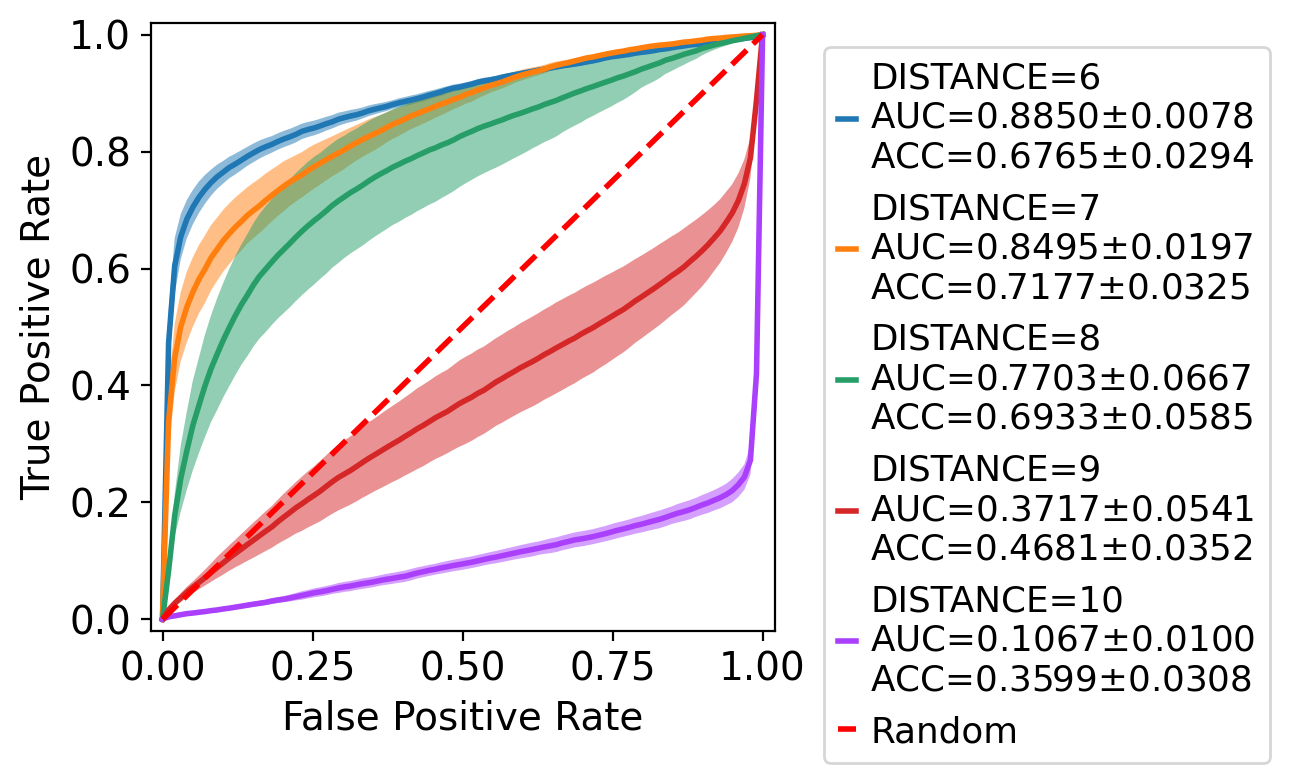

In [16]:
# create roc auc curve
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
for vmax, (fprs, tprs, aucs, accs) in vmax2stats.items():
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, linewidth=2,
            label=f'DISTANCE={vmax}\n' + r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, alpha=0.50)
    print(vmax, np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
# plot the random line
ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
# add on labels and adjust limits
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

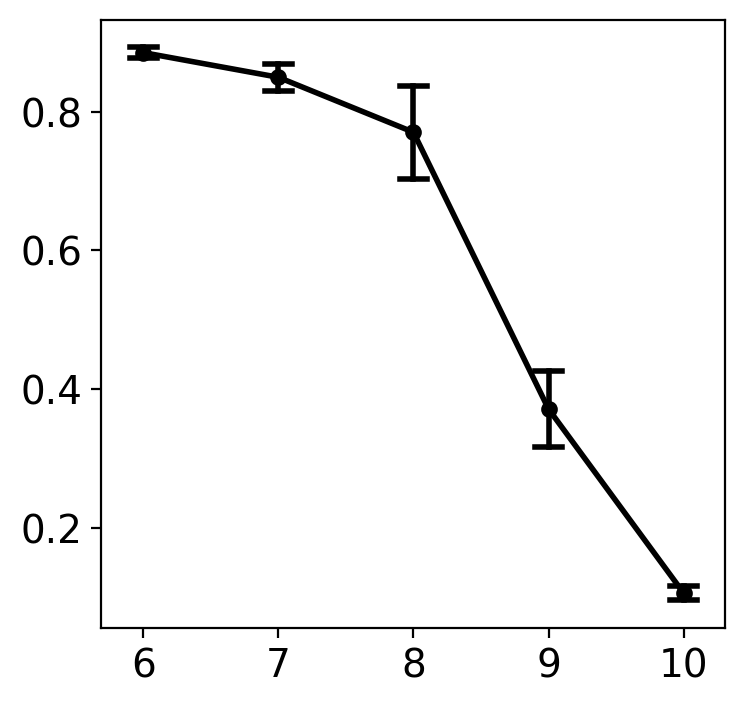

In [17]:
# get the values
xs = list(range(6, 11))
ys_mean = [np.mean(vmax2stats[x][2]) for x in xs]
ys_ci95 = [1.96 * np.std(vmax2stats[x][2]) / np.sqrt(len(vmax2stats[x][2])) for x in xs]
# create the plot
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
ax.scatter(xs, ys_mean, color='k', s=2.5e1)
ax.plot(xs, ys_mean, color='k', lw=2)
# now plot the ci95s
for idx, x in enumerate(xs):
    # retrieve the data
    mean, ci95 = ys_mean[idx], ys_ci95[idx]
    # now plot the ci95
    ax.plot([x]*2, [mean-ci95, mean+ci95], color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean-ci95]*2, color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean+ci95]*2, color='k', lw=2)